In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
!cp -r "/content/gdrive/My Drive/Colab Notebooks/music-compression/" ./

In [0]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Yn3Gjs2GedY45ZHB5NUZsvVkU8jV3API' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1Yn3Gjs2GedY45ZHB5NUZsvVkU8jV3API" -O data.zip && rm -rf /tmp/cookies.txt

--2019-11-13 15:14:43--  https://docs.google.com/uc?export=download&confirm=W89o&id=1Yn3Gjs2GedY45ZHB5NUZsvVkU8jV3API
Resolving docs.google.com (docs.google.com)... 172.217.212.139, 172.217.212.101, 172.217.212.100, ...
Connecting to docs.google.com (docs.google.com)|172.217.212.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-4s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/n4fbhcaum2719kolemsokp4h4eh5ua9i/1573653600000/00405666016553047732/*/1Yn3Gjs2GedY45ZHB5NUZsvVkU8jV3API?e=download [following]
--2019-11-13 15:14:43--  https://doc-0g-4s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/n4fbhcaum2719kolemsokp4h4eh5ua9i/1573653600000/00405666016553047732/*/1Yn3Gjs2GedY45ZHB5NUZsvVkU8jV3API?e=download
Resolving doc-0g-4s-docs.googleusercontent.com (doc-0g-4s-docs.googleusercontent.com)... 108.177.112.132, 2607:f8b0:4001:c12::84
Connecting to doc-0g-4s-docs.googleuserconten

In [0]:
!unzip -qq data.zip -d /content/music-compression/data/sample/fma_small/

In [0]:
%cd music-compression

/content/music-compression


In [0]:
!rm 'data/sample/fma_small/data/train/108925.mp3'
!rm 'data/sample/fma_small/data/train/133297.mp3'
!rm 'data/sample/fma_small/data/train/098567.mp3'
!rm 'data/sample/fma_small/data/train/099134.mp3'

In [0]:
!pip install pydub

In [0]:
import torch
import numpy as np

from runner.train import Trainer

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [0]:
#!rm 'data/sample/fma_xs/train/099134.mp3'

In [0]:
#from utils.data_helper import stat_all_files
#stat_all_files('data/sample/fma_xs/')

In [0]:
cuda_flag = True

In [0]:
trainer = Trainer('data/sample/fma_small/data/',
                  '/content/gdrive/My Drive/Colab Notebooks/music-compression/model_checkpoints/cnn_autoencoder_type1_big', 
                  batch_size=200, 
                  load_from_disk=False, 
                  cuda=cuda_flag)

Processing failed for file: data/sample/fma_small/data/test/098565.mp3
Insufficient size of mp3 file 
Processing failed for file: data/sample/fma_small/data/test/098569.mp3
Insufficient size of mp3 file 


In [0]:
trainer.train(num_epochs=200)

Epoch:1, Loss:1.2717
Epoch:11, Loss:1.2107
Epoch:21, Loss:1.0617
Epoch:31, Loss:0.7791
Epoch:41, Loss:0.8814
Epoch:51, Loss:0.4655
Epoch:61, Loss:0.4710
Epoch:71, Loss:0.5675
Epoch:81, Loss:0.4907
Epoch:91, Loss:0.4895
Epoch:101, Loss:0.4829
Epoch:111, Loss:0.3646
Epoch:121, Loss:0.3866
Epoch:131, Loss:0.4288
Epoch:141, Loss:0.3326
Epoch:151, Loss:0.4179
Epoch:161, Loss:0.3666


KeyboardInterrupt: ignored

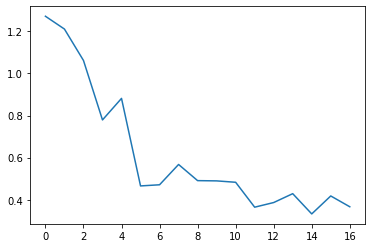

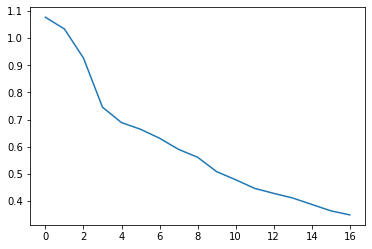

In [0]:
trainer.plot_loss_history(mode='train')
trainer.plot_loss_history(mode='test')

In [0]:
from runner.compression_test import compress_and_regen

In [0]:
model = trainer.model
model.eval()
compress_and_regen('data/sample/fma_xs', 
                   'test/044778.mp3', 
                   model, 
                   '/content/gdrive/My Drive/Colab Notebooks/music-compression/data/sample/fma_xs/model_audio', 
                   is_cuda=cuda_flag)
model.train()